Analyze singles, 6/25/21

In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
orig_df = pd.read_csv('../out/features.csv', index_col=0)
print(len(orig_df))

orig_df = orig_df.fillna(0)
orig_df['Name (unique)'] = orig_df.index
orig_df = orig_df.drop_duplicates(subset = 'Name (unique)')

print(len(orig_df))


7297
7297


In [3]:
all_df = pd.read_csv('../out/a_format_data/all_stepcharts.csv', index_col=0)
all_df['Level'] = all_df['METER']

df = orig_df.merge(all_df, on = 'Name (unique)', how = 'left')
print(len(df))

7297


In [4]:
df['Is singles'] = (df['Steptype simple'].str.contains('S'))
singles_df = df[df['Is singles']]

singles_df.shape

(4529, 402)

In [5]:
df = singles_df

In [204]:
dfs = df[df['Level'] >= 13]

dfs.to_csv('../out/features_lv13.csv')

### columns

In [107]:
for col in df.columns:
    print(col)

Travel (mm) - 50%
Travel (mm) - 80%
Travel (mm) - 99%
Hold - frequency
Hold - 50% nps
Hold - 80% nps
Hold - 99% nps
Hold - max len
Hold - nps of longest
Hold - % 90+ twist
Hold - % diagonal+ twist
Hold taps - frequency
Hold taps - 50% nps
Hold taps - 80% nps
Hold taps - 99% nps
Hold taps - max len
Hold taps - nps of longest
Hold taps - % 90+ twist
Hold taps - % diagonal+ twist
Splits - frequency
Splits - 50% nps
Splits - 80% nps
Splits - 99% nps
Splits - max len
Splits - nps of longest
Splits - % 90+ twist
Splits - % diagonal+ twist
Jump - frequency
Jump - 50% nps
Jump - 80% nps
Jump - 99% nps
Jump - max len
Jump - nps of longest
Jump - % 90+ twist
Jump - % diagonal+ twist
Bracket - frequency
Bracket - 50% nps
Bracket - 80% nps
Bracket - 99% nps
Bracket - max len
Bracket - nps of longest
Bracket - % 90+ twist
Bracket - % diagonal+ twist
Double step - frequency
Double step - 50% nps
Double step - 80% nps
Double step - 99% nps
Double step - max len
Double step - nps of longest
Double ste

In [108]:
stat_cols = [col for col in df.columns if ' - frequency' in col]

for col in stat_cols:
    print(col.replace(' - frequency', ''))

Hold
Hold taps
Splits
Jump
Bracket
Double step
Footswitch
Jack
Bracket footswitch
Hold tap single foot
Hold footslide
Hold footswitch
Staggered hit
Hands
Drill
Run
Hold run
Bracket drill
Irregular rhythm
Bracket jump run
Side3 singles
Mid4 doubles
Mid6 doubles
Run with brackets
Jump run
Stairs, singles
Stairs, doubles
Broken stairs, doubles
Spin
Twist solo diagonal
Twist angle - 90
Twist angle - diagonal
Twist angle - 180


In [26]:
from collections import Counter
Counter(df['Pack'])

Counter({'FIESTA 2': 399,
         'PRO~PRO2': 502,
         'XX': 416,
         'REBIRTH~PREX 3': 295,
         'S.E.~EXTRA': 245,
         'PRIME': 502,
         'NX2': 361,
         'PRIME 2': 383,
         'INFINITY': 168,
         'JUMP': 30,
         'EXCEED~ZERO': 386,
         'FIESTA EX': 242,
         'FIESTA': 231,
         'NX ABSOLUTE': 200,
         '1ST~3RD': 169})

### explore

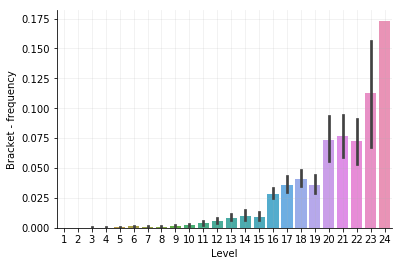

In [49]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

stat = 'Bracket - frequency'

sns.barplot(
    x = 'Level',
    y = stat,
#     data = df[(0 < df[stat]) & (df[stat] < 50)],
    data = df[(df[stat] < 50)],
    ax = ax,
)
sns.despine()
plt.grid(alpha=0.2)

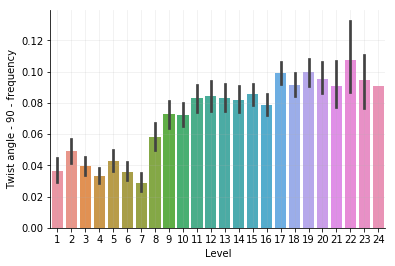

In [52]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

stat = 'Twist angle - 90 - frequency'

sns.barplot(
    x = 'Level',
    y = stat,
#     data = df[(0 < df[stat]) & (df[stat] < 50)],
    data = df[(df[stat] < 50)],
    ax = ax,
)


sns.despine()
plt.grid(alpha=0.2)

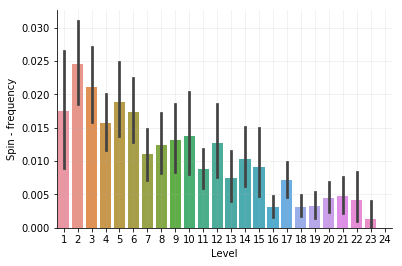

In [53]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

stat = 'Spin - frequency'

sns.barplot(
    x = 'Level',
    y = stat,
#     data = df[(0 < df[stat]) & (df[stat] < 50)],
    data = df[(df[stat] < 50)],
    ax = ax,
)


sns.despine()
plt.grid(alpha=0.2)

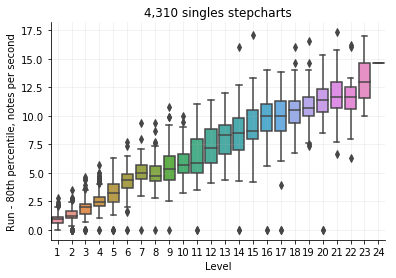

In [15]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

sns.boxplot(
    x = 'Level',
    y = 'Run - 80% nps',
    data = df,
    ax = ax,
)
sns.despine()
plt.grid(alpha=0.2)

plt.ylabel('Run - 80th percentile, notes per second');
plt.title(f'{len(df):,} singles stepcharts');

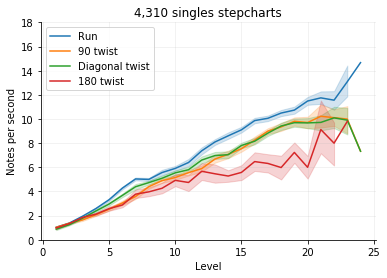

In [39]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

#

nm_to_stat = {
    'Run': 'Run - 80% nps',
    '90 twist': 'Twist angle - 90 - 80% nps',
    'Diagonal twist': 'Twist angle - diagonal - 80% nps',
    '180 twist': 'Twist angle - 180 - 80% nps',
}
for nm, stat in nm_to_stat.items():
    dfs = df[(0 < df[stat]) & (df[stat] < 50)]

    sns.lineplot(
        x = 'Level',
        y = stat,
        data = dfs,
        ax = ax,
        label = nm,
    )
    
sns.despine()
plt.grid(alpha=0.2)

plt.ylim(bottom = 0, top=18)

plt.ylabel('Notes per second');
plt.title(f'{len(df):,} singles stepcharts');

### sort charts by ...

In [28]:
# Twist

modern = ['FIESTA 2', 'FIESTA', 'XX', 'PRIME 2', 'PRIME']
crit = (df['Level'] >= 6) & (df['Level'] <= 8) & (~df['Name (unique)'].str.contains('infinity')) & (df['Pack'].isin(modern))

df['r1'] = df['Twist angle - close diagonal - frequency'] / df['Twist angle - 90 - frequency']
df['r2'] = df['Twist angle - 90 - frequency'] / df['Twist angle - close diagonal - frequency']
df['r1'] = df['r1'].fillna(0)
df['r1'].replace([np.inf, -np.inf], 0, inplace=True)
df['r2'] = df['r2'].fillna(0)
df['r2'].replace([np.inf, -np.inf], 0, inplace=True)
df['sum'] = df['Twist angle - close diagonal - frequency'] + df['Twist angle - 90 - frequency']

df['Ratio'] = df[['r1', 'r2']].min(axis = 'columns')

df['Score twist'] = df['Ratio'] / 3 + df['sum'] / 2

dfs = df[df['sum'] >= 0.1]

subcols = ['Name (unique)', 'Level', col, 'Score twist', 'Twist angle - 90 - frequency', 'sum', 'Ratio']
dfs[crit].sort_values(by='Score twist', ascending=False)[subcols].iloc[:20]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Name (unique),Level,Twist angle - close diagonal - frequency,Score twist,Twist angle - 90 - frequency,sum,Ratio
1692,U Got Me Rocking - MAX S8 arcade,8,0.160959,0.489060,0.164384,0.325342,0.979167
5295,K.O.A \ - Banya Production S8 shortcut,8,0.083770,0.417103,0.083770,0.167539,1.000000
5941,Yeo rae a - SID-Sound S8 arcade,8,0.092233,0.405595,0.087379,0.179612,0.947368
3651,Move That Body - DM Ashura feat. Skizzo & Hann...,8,0.056716,0.390050,0.056716,0.113433,1.000000
932,Cosmical Rhythm - SID-SOUND S8 arcade,8,0.076705,0.382506,0.071023,0.147727,0.925926
1462,Destination - SHK S7 arcade,7,0.054545,0.370707,0.051948,0.106494,0.952381
3823,Elysium - Warak S8 arcade,8,0.055970,0.353819,0.063433,0.119403,0.882353
6533,Tribe Attacker - Hi-G S6 arcade,6,0.088235,0.345392,0.122549,0.210784,0.720000
1465,Fantastic Baby - Bigbang S8 arcade,8,0.090000,0.345175,0.126667,0.216667,0.710526
2758,Electric - The DNC S6 arcade,6,0.106195,0.342920,0.079646,0.185841,0.750000


In [9]:
# Stairs

modern = ['FIESTA 2', 'FIESTA', 'XX', 'PRIME 2', 'PRIME']
crit = (df['Level'] >= 6) & (df['Level'] <= 12) & (~df['Name (unique)'].str.contains('infinity')) & (df['Pack'].isin(modern))

col = 'Stairs, singles - frequency'

subcols = ['Name (unique)', 'Level', col]
df[crit].sort_values(by=col, ascending=False)[subcols].iloc[:20]

,Name (unique),Level,"Stairs, singles - frequency"
4190,Lucid(PIU Edit) - Yak Won S11 arcade,11,0.164671
1330,Energetic - Wanna One S9 arcade,9,0.157088
5355,Flying duck - Cherry Filter S10 arcade,10,0.152284
5806,THE REVOLUTION - MAX & DOOM S11 arcade,11,0.131443
4819,HANN (Alone) - (G)I-DLE S8 arcade,8,0.109890
1265,Travel to future - Neutral Moon S11 arcade,11,0.106145
5454,Sorceress Elise - YAHPP S10 arcade,10,0.092010
2487,Ice of Death - Fiverwater S10 arcade,10,0.091922
16,Heart Attack - DJ Counterforce S11 arcade,11,0.085616
6817,Cross Time - Brandy S11 arcade,11,0.084168


In [181]:
# Jacks

crit = (df['Level'] >= 13)

col = 'Jack - frequency'

subcols = ['Name (unique)', 'Level', col]
df[crit].sort_values(by=col, ascending=False)[subcols].iloc[:20]

,Name (unique),Level,Jack - frequency
1696,Lovely - Kim Jong Kook S13 fullsong hidden,13,0.304574
3785,Dance Vibrations - Elpis S14 arcade,14,0.212996
3694,Love is a Danger Zone pt. 2 another - BanYa S1...,17,0.188679
2972,Tribal Style - KaW S14 arcade,14,0.183193
3894,Final Audition - BanYa S15 arcade,15,0.178752
2037,Native - SHK S20 arcade,20,0.166667
4040,Melodia - Lylloo ft. Egas S14 arcade,14,0.162011
153,Bad End Night - HitoshizukuP x yama S17 arcade,17,0.160656
2056,Allegro Furioso - DM Ashura S20 arcade,20,0.157588
1569,BEMERA - YAHPP S16 remix,16,0.157347


In [200]:
# Jacks

crit = (df['Level'] >= 13)

col = 'Footswitch - frequency'

subcols = ['Name (unique)', 'Level', col]
df[crit].sort_values(by=col, ascending=False)[subcols].iloc[:20]

,Name (unique),Level,Footswitch - frequency
1936,Loki - Lotze S21 arcade,21,0.316476
3894,Final Audition - BanYa S15 arcade,15,0.210793
95,Beat of The War 2 - BanYa S21 arcade,21,0.080056
1842,Banya-P Classic Mix - Banya S22 remix hidden,22,0.078431
160,Incubator - DJS\\ S18 shortcut infinity,18,0.069486
3798,Passacaglia - SynthWulf S15 arcade infinity,15,0.055749
3425,Napalm - Doin S21 arcade,21,0.055325
2612,ESCAPE - D_AAN S24 arcade,24,0.042328
3748,Passacaglia - SynthWulf S19 arcade train,19,0.038400
2261,WI-EX-DOC-VA - YAHPP S15 remix,15,0.038108


In [199]:
# Jacks

threshold = 0.005
crit = (df['Level'] >= 13) & (df['Jack - frequency'] > threshold) & (df['Footswitch - frequency'] > threshold)

col = 'Jack - frequency'

subcols = ['Name (unique)', 'Level', 'Jack - frequency', 'Footswitch - frequency']

dfs = df[crit][subcols]

jack = 'Jack - frequency'
fs = 'Footswitch - frequency'

dfs['r1'] = dfs[jack] / dfs[fs]
dfs['r2'] = dfs[fs] / dfs[jack]   
dfs['score'] = dfs[['r1', 'r2']].apply(min, axis = 'columns')
dfs['score'] *= dfs[fs]

print(len(df[crit]))

display(
    dfs.sort_values(by='score', ascending=False).iloc[:20]
)

102


,Name (unique),Level,Jack - frequency,Footswitch - frequency,r1,r2,score
3894,Final Audition - BanYa S15 arcade,15,0.178752,0.210793,0.848000,1.179245,0.178752
1842,Banya-P Classic Mix - Banya S22 remix hidden,22,0.056209,0.078431,0.716667,1.395349,0.056209
160,Incubator - DJS\\ S18 shortcut infinity,18,0.087613,0.069486,1.260870,0.793103,0.055110
3425,Napalm - Doin S21 arcade,21,0.049793,0.055325,0.900000,1.111111,0.049793
3748,Passacaglia - SynthWulf S19 arcade train,19,0.033600,0.038400,0.875000,1.142857,0.033600
2261,WI-EX-DOC-VA - YAHPP S15 remix,15,0.043364,0.038108,1.137931,0.878788,0.033489
958,Native - SHK S17 arcade,17,0.032362,0.037217,0.869565,1.150000,0.032362
95,Beat of The War 2 - BanYa S21 arcade,21,0.029494,0.080056,0.368421,2.714286,0.029494
2881,BEDLAM - SANY-ON S22 arcade,22,0.024961,0.031201,0.800000,1.250000,0.024961
3599,Bee - BanYa S15 arcade,15,0.022676,0.031746,0.714286,1.400000,0.022676


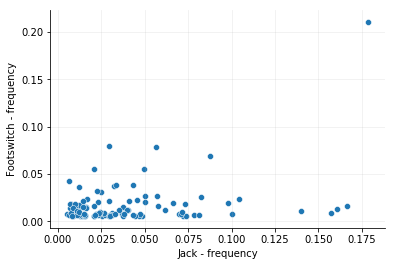

In [188]:
sns.scatterplot(
    x = 'Jack - frequency',
    y = 'Footswitch - frequency',
    data = df[crit],
)
sns.despine()
plt.grid(alpha=0.2)

### fraction of charts with ...

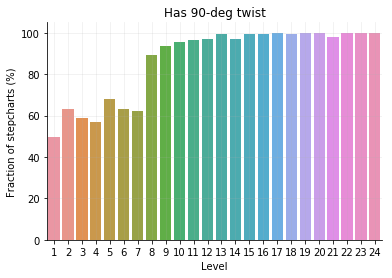

In [129]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
#

stat = 'Twist angle - 90 - frequency'

# all_counts = df.groupby('Level')['Name (unique)'].count()

has_stat = f'Has {stat}'.replace(' - frequency', '')
df[has_stat] = (df[stat] > 0).astype(int)

bylevel_df = df.groupby('Level')[has_stat].describe()
bylevel_df['Fraction of stepcharts (%)'] = 100*bylevel_df['mean']
bylevel_df['Level'] = bylevel_df.index

sns.barplot(
    x = 'Level',
    y = 'Fraction of stepcharts (%)',
    data = bylevel_df,
    ax = ax,
)
sns.despine()
plt.grid(alpha=0.2)
# plt.title(has_stat);
plt.title('Has 90-deg twist');

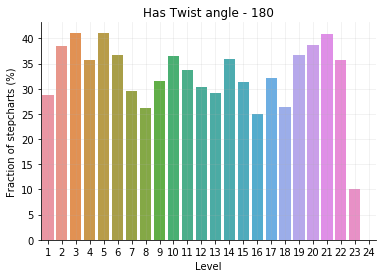

In [74]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
#

stat = 'Twist angle - 180 - frequency'

# all_counts = df.groupby('Level')['Name (unique)'].count()

has_stat = f'Has {stat}'.replace(' - frequency', '')
df[has_stat] = (df[stat] > 0).astype(int)

bylevel_df = df.groupby('Level')[has_stat].describe()
bylevel_df['Fraction of stepcharts (%)'] = 100*bylevel_df['mean']
bylevel_df['Level'] = bylevel_df.index

sns.barplot(
    x = 'Level',
    y = 'Fraction of stepcharts (%)',
    data = bylevel_df,
    ax = ax,
)
sns.despine()
plt.grid(alpha=0.2)
plt.title(has_stat);
# plt.title('Has 90-deg twist');

KeyError: 'Twist solo diagonal - frequency'

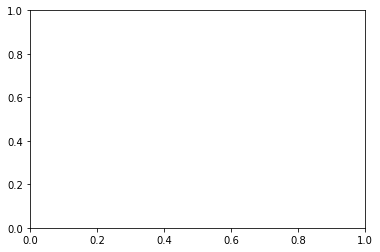

In [58]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
#

stat = 'Twist solo diagonal - frequency'

# all_counts = df.groupby('Level')['Name (unique)'].count()

has_stat = f'Has {stat}'.replace(' - frequency', '')
df[has_stat] = (df[stat] > 0).astype(int)

bylevel_df = df.groupby('Level')[has_stat].describe()
bylevel_df['Fraction of stepcharts (%)'] = 100*bylevel_df['mean']
bylevel_df['Level'] = bylevel_df.index

sns.barplot(
    x = 'Level',
    y = 'Fraction of stepcharts (%)',
    data = bylevel_df,
    ax = ax,
)
sns.despine()
plt.grid(alpha=0.2)
plt.title(has_stat);
# plt.title('Has 90-deg twist');

#### investigate low level charts with twists

YOU AND I - Dreamcatcher S1 has "180 twists" unless double stepped.

In [78]:
stat = 'Twist angle - 180 - frequency'

has_stat = f'Has {stat}'.replace(' - frequency', '')

test_df = df[(df[has_stat]) & (df['Level'] == 1)]
display(test_df[['Name (unique)', stat, has_stat]])

,Name (unique),Twist angle - 180 - frequency,Has Twist angle - 180
49,Slightly - 45RPM SP1 arcade,0.014925,1
72,Power of Dream - Victoria S1 arcade,0.053763,1
151,Eternity - Uhm Jung Hwa S1 arcade,0.043478,1
256,Point Break - BanYa S1 arcade,0.044444,1
309,Jackpot - BLOCK B S1 arcade,0.037736,1
373,A.U Ready - Gil Gun S1 arcade,0.027778,1
397,First Love (Spanish ver.) - Banya SP1 arcade,0.011905,1
516,King of the Beats - Throwdown S1 arcade,0.012821,1
574,Kiss Me - Debbie Scott S1 arcade,0.050633,1
853,First Love - BanYa SP1 arcade,0.011905,1


In [130]:
stat = 'Twist angle - 90 - frequency'

has_stat = f'Has {stat}'.replace(' - frequency', '')

test_df = df[(df[has_stat]) & (df['Level'] == 4)]
display(test_df[['Name (unique)', stat, has_stat]])

,Name (unique),Twist angle - 90 - frequency,Has Twist angle - 90
0,The Monkey Song - Rhythm n Kids S4 arcade,0.039474,1
4,LaLaLa - Big Bang S4 fullsong,0.023316,1
26,V.I.P - Bada S4 fullsong,0.042042,1
52,Pierrot - Lee Hyun Do S4 arcade,0.186813,1
84,Allegro Con Fuoco - DM Ashura S4 arcade,0.004425,1
87,First Love (Spanish ver.) - Banya S4 arcade,0.033113,1
88,Oasis - KaW S4 arcade,0.013793,1
100,BOOMBAYAH - BLACKPINK S4 arcade,0.058201,1
170,Mambo No. 5 - Lou Bega (Cover) S4 arcade,0.037500,1
172,Shake it Up - ROD S4 arcade,0.013605,1


## train model

In [32]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
# model = GradientBoostingRegressor()

nms = list(df['Name (unique)'])
sctypes = []
for typ in ['arcade', 'fullsong', 'shortcut', 'remix']:
    sctype = f'Stepchart - {typ}'
    sctypes.append(sctype)
    df[sctype] = [int(bool(typ in nm)) for nm in nms]

ft_cols = [x for x in orig_df.columns if x != 'Name (unique)'] + sctypes
x = np.array(df[ft_cols])
y = np.array(df['Level'])

model = HistGradientBoostingRegressor(monotonic_cst = [1]*x.shape[-1])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [208]:
model.fit(x_train, y_train)

HistGradientBoostingRegressor(monotonic_cst=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                                             1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                                             1, 1, 1, 1, 1, 1, ...])

0.9649476749355516


/home/maxwshen/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


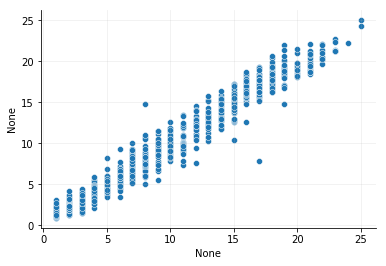

In [165]:
print(model.score(x_test, y_test))

pred_y_test = model.predict(x_test)

sns.scatterplot(y_test, pred_y_test)
sns.despine()
plt.grid(alpha=0.2)

/home/maxwshen/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


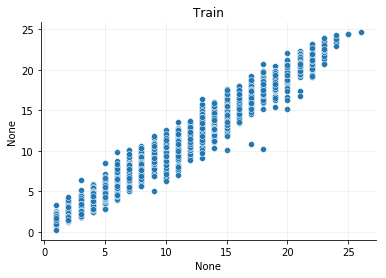

In [166]:
sns.scatterplot(y_train, model.predict(x_train),)
sns.despine()
plt.grid(alpha=0.2)
plt.title('Train');

In [33]:
# Train on entire dataset

model.fit(x, y)
print(model.score(x, y))

pred_level = model.predict(x)
resid = pred_level - y

df['Predicted level'] = pred_level
df['Residual'] = resid

0.9786837986799107


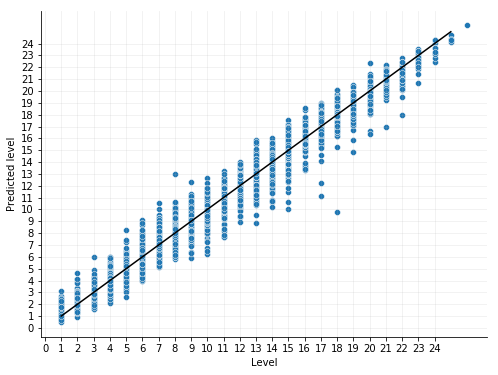

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('white')
#

sns.scatterplot(
    x = 'Level',
    y = 'Predicted level',
    data = df,
)
sns.despine()
plt.grid(alpha=0.2, markevery=1)

plt.xticks(np.arange(0, 25, 1));
plt.yticks(np.arange(0, 25, 1));

plt.plot([1, 25], [1, 25], '-', color='black')

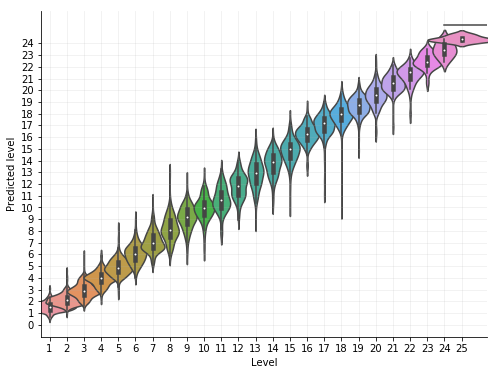

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('white')
#

sns.violinplot(
    x = 'Level',
    y = 'Predicted level',
    data = df,
    width = 4,
)
sns.despine()
plt.grid(alpha=0.2, markevery=1)

plt.xticks(np.arange(0, 25, 1));
plt.yticks(np.arange(0, 25, 1));

0.4981232060057408

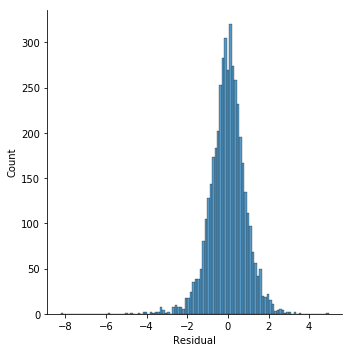

In [36]:
sns.displot(df['Residual'])

sum(df['Residual'] < 0) / len(df)

In [37]:
# Most misrated charts

df['Residual abs'] = np.abs(df['Residual'])
subcols = ['Name (unique)', 'Level', 'Predicted level', 'Residual', 'Residual abs']
df.sort_values(by = 'Residual abs', ascending=False)[subcols].iloc[:15]

,Name (unique),Level,Predicted level,Residual,Residual abs
5200,Switronic - SHORT CUT - - SHK S18 shortcut,18,9.761885,-8.238115,8.238115
3831,LOVE SCENARIO - iKON S17 arcade,17,11.110949,-5.889051,5.889051
562,NoNoNo - Apink SP15 arcade,15,10.002218,-4.997782,4.997782
4660,EXTRA BanYa Remix - BanYa S8 remix,8,12.961953,4.961953,4.961953
5696,Pumptris Quattro - YAHPP S17 arcade,17,12.219375,-4.780625,4.780625
6006,Fire - 2NE1 S15 arcade,15,10.635004,-4.364996,4.364996
552,Yeo rae a - SID-Sound S13 arcade,13,8.864446,-4.135554,4.135554
1737,Tales of Pumpnia - Applesoda S19 arcade,19,14.868524,-4.131476,4.131476
3121,Loki - Lotze S21 arcade,21,16.927184,-4.072816,4.072816
2963,Banya-P Classic Mix - Banya S22 remix hidden,22,17.994887,-4.005113,4.005113


In [38]:
# Most misrated charts >= 15

df['Residual abs'] = np.abs(df['Residual'])
subcols = ['Name (unique)', 'Level', 'Predicted level', 'Residual']
df[df['Level'] >= 15].sort_values(by = 'Residual abs', ascending=False)[subcols].iloc[:20]

,Name (unique),Level,Predicted level,Residual
5200,Switronic - SHORT CUT - - SHK S18 shortcut,18,9.761885,-8.238115
3831,LOVE SCENARIO - iKON S17 arcade,17,11.110949,-5.889051
562,NoNoNo - Apink SP15 arcade,15,10.002218,-4.997782
5696,Pumptris Quattro - YAHPP S17 arcade,17,12.219375,-4.780625
6006,Fire - 2NE1 S15 arcade,15,10.635004,-4.364996
1737,Tales of Pumpnia - Applesoda S19 arcade,19,14.868524,-4.131476
3121,Loki - Lotze S21 arcade,21,16.927184,-4.072816
2963,Banya-P Classic Mix - Banya S22 remix hidden,22,17.994887,-4.005113
4161,Naissance - BanYa S20 arcade,20,16.381726,-3.618274
4007,2006. LOVE SONG - Banya Production S15 arcade,15,11.471434,-3.528566


In [39]:
# Charts pred. harder than their listed level > 16

subcols = ['Name (unique)', 'Level', 'Predicted level', 'Residual']
df[df['Level'] >= 16].sort_values(by = 'Residual', ascending=False)[subcols].iloc[:20]

,Name (unique),Level,Predicted level,Residual
6560,Extravaganza - BanYa S16 arcade,16,18.527960,2.527960
1401,Beat of The War 2 - BanYa S16 arcade,16,18.373510,2.373510
1488,Final Audition EP. 2-X - YAHPP S20 shortcut,20,22.329837,2.329837
5070,The Ark Sailing Over Truth - Ashley Scared The...,18,20.071260,2.071260
4621,Club Night - Matduke S18 arcade,18,20.068813,2.068813
2634,NARCISISTA POR EXCELENCIA - PXNDX S17 fullsong,17,18.962557,1.962557
3059,Tream Vook of the war REMIX - BanYa S17 remix ...,17,18.928679,1.928679
1571,Anguished Unmaking - void S17 arcade,17,18.854616,1.854616
7150,Final Audition Ep. 2-2 - YAHPP S17 arcade,17,18.838072,1.838072
2007,Emperor - BanYa S16 arcade,16,17.817339,1.817339


In [40]:
# Charts pred. harder than their listed level

subcols = ['Name (unique)', 'Level', 'Predicted level', 'Residual']
df.sort_values(by = 'Residual', ascending=False)[subcols].iloc[:20]

,Name (unique),Level,Predicted level,Residual
4660,EXTRA BanYa Remix - BanYa S8 remix,8,12.961953,4.961953
3114,Chimera - YAHPP S7 arcade,7,10.530113,3.530113
756,Beat the Ghost - Banya Production S9 shortcut ...,9,12.285867,3.285867
445,Slightly - 45RPM S5 fullsong,5,8.271821,3.271821
3722,Utopia - ? S6 arcade,6,9.126689,3.126689
5098,Final Audition Ep. 2-2 - YAHPP S7 arcade,7,10.060806,3.060806
5918,Change Myself - Wang Li Hong (Cover) S3 fullsong,3,5.952649,2.952649
5476,Extravaganza - BanYa S6 arcade hidden,6,8.884954,2.884954
4674,Wake Up - Kid Whatever S13 arcade,13,15.848327,2.848327
5125,Huu Yah Yeah - Y-Me S6 arcade,6,8.689986,2.689986


In [41]:
df[df['Name (unique)'] == 'U Got 2 Know - MAX S20 arcade'][subcols]

,Name (unique),Level,Predicted level,Residual
4726,U Got 2 Know - MAX S20 arcade,20,18.087402,-1.912598


In [42]:
df[df['Name (unique)'] == 'Houkago Stride - Last Note. S6 arcade'][subcols]

,Name (unique),Level,Predicted level,Residual
1753,Houkago Stride - Last Note. S6 arcade,6,7.924028,1.924028


In [43]:
df[df['Name (unique)'] == 'ESCAPE - D_AAN S21 arcade'][subcols]

,Name (unique),Level,Predicted level,Residual
6734,ESCAPE - D_AAN S21 arcade,21,21.140806,0.140806


In [44]:
df[df['Name (unique)'] == 'Sorceress Elise - YAHPP S21 arcade'][subcols]

,Name (unique),Level,Predicted level,Residual
6500,Sorceress Elise - YAHPP S21 arcade,21,20.753637,-0.246363


In [45]:
df[df['Name (unique)'] == 'Yeo rae a - SID-Sound S13 arcade'][subcols]

,Name (unique),Level,Predicted level,Residual
552,Yeo rae a - SID-Sound S13 arcade,13,8.864446,-4.135554


In [175]:
df[df['Name (unique)'] == 'Gothique Resonance - P4Koo S20 arcade'][subcols]

,Name (unique),Level,Predicted level,Residual
509,Gothique Resonance - P4Koo S20 arcade,20,20.755075,0.755075


In [176]:
# Pred. level by labeled level

subcols = ['Name (unique)', 'Level', 'Predicted level', 'Residual']
lvl = 22
display(df[df['Level'] == lvl].sort_values(by = 'Predicted level', ascending=False)[subcols].iloc[:20])
display(df[df['Level'] == lvl].sort_values(by = 'Predicted level', ascending=True)[subcols].iloc[:20])

,Name (unique),Level,Predicted level,Residual
671,Final Audition Ep. 2-2 - YAHPP S22 arcade,22,23.270351,1.270351
4312,Club Night - Matduke S22 arcade,22,23.068418,1.068418
233,Banya-P Guitar Remix - Banya Production S22 remix,22,22.486626,0.486626
2676,Achluoias - D_AAN S22 arcade,22,22.135370,0.135370
3977,Full Moon - Dreamcatcher S22 arcade,22,22.130914,0.130914
3780,Vulcan - Memme S22 remix,22,22.056654,0.056654
2715,The Ark Sailing Over Truth - Ashley Scared The...,22,22.032168,0.032168
3367,Ignis Fatuus(DM Ashura Mix) - BanYa & DM Ashur...,22,21.936276,-0.063724
16,Further - Doin S22 arcade,22,21.859510,-0.140490
1584,Hardkore of the North - Diclonius Kid S22 arcade,22,21.847190,-0.152810


,Name (unique),Level,Predicted level,Residual
1840,Banya-P Classic Mix - Banya S22 remix hidden,22,18.303765,-3.696235
805,Allegro Con Fuoco - DM Ashura S22 arcade,22,18.985160,-3.014840
1267,Can-can ~Orpheus in The Party Mix~ - Sr. Lan B...,22,19.588105,-2.411895
354,Conflict - Siromaru + Cranky S22 arcade,22,19.610316,-2.389684
2870,Gargoyle - Sanxion7 S22 arcade,22,19.924873,-2.075127
1051,Euphorium - DM Ashura S22 arcade infinity,22,19.957602,-2.042398
800,Mr. Larpus - BanYa S22 arcade,22,20.241844,-1.758156
688,Passacaglia - SynthWulf S22 arcade infinity,22,20.417064,-1.582936
4078,Crashday - Crash S22 fullsong,22,20.492447,-1.507553
1017,Trato De No Trabarme - Big metra S22 fullsong,22,20.583160,-1.416840


## preliminary tagging

In [177]:
# query = 'Imagination - SHK S17 arcade'
# query = 'Bad Apple!! feat. Nomico - Masayoshi Minoshima S17 arcade'
# query = 'Death Moon - SHK S22 shortcut'
query = 'Super Fantasy - SHK S16 arcade'
# query = 'Bad End Night - HitoshizukuP x yama S17 arcade'
# query = 'Rock the house - Matduke S18 shortcut'
# query = '8 6 - DASU S16 arcade'
# query = 'Loki - Lotze S21 arcade'
# query = 'Dual Racing <RED vs BLUE> - Nato & r300k S16 arcade'

row = df[df['Name (unique)'] == query].iloc[0]
level = row['Level']
context = df[(level - 3 <= df['Level']) & (df['Level'] <= level)]

fq_cols = [col for col in df.columns if '- frequency' in col]

pct_threshold = 0.75

tags = {}
for fq_col in fq_cols:
    data = context[fq_col]
    pct = sum(row[fq_col] > x for x in data) / len(context)
    tag = fq_col.replace(' - frequency', '')
    if pct > 0:
        print(tag.rjust(30), f'{row[fq_col]:.0%}'.rjust(4), f'{pct:.0%}'.rjust(4))
    if pct >= pct_threshold:
        tags[tag] = pct
        
        
print('\nFound tags')
sorted_tags = sorted(tags, key=tags.get, reverse=True)
for k in sorted_tags:
    print(k.ljust(35), f'{tags[k]:.0%}')


                          Hold  22%  79%
                     Hold taps   0%  31%
                          Jump   0%   2%
                   Double step   1%   9%
                          Jack   1%   2%
                           Run  69%  80%
                      Hold run  14%  93%
              Irregular rhythm   3%  29%
                 Side3 singles   9%  44%
               Stairs, singles   1%  68%
            Twist angle - none  94%  88%
              Twist angle - 90   4%  21%
  Twist angle - close diagonal   2%  11%

Found tags
Hold run                            93%
Twist angle - none                  88%
Run                                 80%
Hold                                79%


### explore

In [343]:
level = 18
context = df[(level - 3 <= df['Level']) & (df['Level'] <= level)]

stat = 'Bracket'

fq_col = f'{stat} - frequency'

cols = ['Name (unique)', fq_col]
context.sort_values(by=fq_col, ascending = False)[cols].iloc[:10]

,Name (unique),Bracket - frequency
1420,Pumptris Quattro - YAHPP S17 arcade,0.477707
3777,Up & Down - EXID S17 arcade,0.371571
3240,Another Truth - Novasonic S15 arcade,0.303725
1014,Will-O-The-Wisp - BanYa S18 arcade hidden,0.248276
712,Bar Bar Bar - Crayon Pop S16 fullsong,0.212500
3435,Imagination - SHK S17 arcade,0.204604
1188,Gun Rock - Banya Production S18 arcade,0.200472
2291,FFF - Doin S18 arcade,0.188494
2222,What Happened - Throwdown S18 shortcut infinity,0.173134
1178,Break It Down - MAZO S16 arcade,0.164456


In [344]:
level = 18
context = df[(level - 3 <= df['Level']) & (df['Level'] <= level)]

stat = 'Drill'

fq_col = f'{stat} - frequency'

cols = ['Name (unique)', fq_col]
context[context['Level'] == level].sort_values(by=fq_col, ascending = False)[cols].iloc[:10]

,Name (unique),Drill - frequency
2984,Procedimientos Para Llegar A Un Comun Acuerdo ...,0.398744
733,Rock the house - Matduke S18 shortcut,0.386555
362,MATADOR - Cranky S18 arcade,0.344729
1014,Will-O-The-Wisp - BanYa S18 arcade hidden,0.331034
951,Moonlight - BanYa S18 arcade,0.319927
2222,What Happened - Throwdown S18 shortcut infinity,0.295522
2427,Guitar Man - Banya Production S18 arcade,0.259332
4089,Yog-Sothoth - Nato S18 shortcut,0.253289
4252,Ineffective Boss Without Power - Norazo S18 ar...,0.246057
313,Euphoria - KaW feat. Smiley S18 arcade,0.236984


In [345]:
stat_cols = [col for col in df.columns if 'frequency' in col]
print(stat_cols)

['Hold - frequency', 'Hold taps - frequency', 'Splits - frequency', 'Jump - frequency', 'Bracket - frequency', 'Double step - frequency', 'Footswitch - frequency', 'Jack - frequency', 'Bracket footswitch - frequency', 'Hold tap single foot - frequency', 'Hold footslide - frequency', 'Hold footswitch - frequency', 'Staggered hit - frequency', 'Hands - frequency', 'Run - frequency', 'Hold run - frequency', 'Drill - frequency', 'Bracket drill - frequency', 'Irregular rhythm - frequency', 'Bracket jump run - frequency', 'Side3 singles - frequency', 'Mid4 doubles - frequency', 'Mid6 doubles - frequency', 'Run with brackets - frequency', 'Jump run - frequency', 'Stairs, singles - frequency', 'Stairs, doubles - frequency', 'Broken stairs, doubles - frequency', 'Spin - frequency', 'Twist angle - 90 - frequency', 'Twist angle - diagonal - frequency', 'Twist angle - 180 - frequency']


In [346]:
for stat_col in stat_cols:
    print(stat_col.ljust(35), max(df[stat_col]))

Hold - frequency                    1.0
Hold taps - frequency               0.9974811083123426
Splits - frequency                  0.0
Jump - frequency                    0.8540925266903915
Bracket - frequency                 0.4861460957178842
Double step - frequency             0.8938775510204081
Footswitch - frequency              0.37846655791190864
Jack - frequency                    0.5857142857142857
Bracket footswitch - frequency      0.0
Hold tap single foot - frequency    0.4811083123425693
Hold footslide - frequency          0.02032520325203252
Hold footswitch - frequency         0.03614457831325301
Staggered hit - frequency           0.31475409836065577
Hands - frequency                   0.022556390977443608
Run - frequency                     1.0
Hold run - frequency                0.6764705882352942
Drill - frequency                   0.9428571428571428
Bracket drill - frequency           0.18160919540229886
Irregular rhythm - frequency        0.7489082969432315
Bracket 

In [347]:
context = df
print(len(context))
stat = 'Bracket drill'

fq_col = f'{stat} - frequency'

cols = ['Name (unique)', fq_col]
context.sort_values(by=fq_col, ascending = False)[cols].iloc[:20]

4341


,Name (unique),Bracket drill - frequency
1014,Will-O-The-Wisp - BanYa S18 arcade hidden,0.181609
555,Death Moon - SHK S22 shortcut,0.147752
1856,What Happened - Throwdown S21 shortcut infinity,0.108333
2222,What Happened - Throwdown S18 shortcut infinity,0.086567
1767,Tream Vook of the war REMIX - BanYa S17 remix ...,0.073479
4006,CHICKEN WING - Banya S20 shortcut,0.067935
3364,Crashday - Crash S23 arcade,0.054817
1641,Sorceress Elise - YAHPP S23 arcade,0.052408
1746,WI-EX-DOC-VA - YAHPP S21 remix,0.047161
1529,Queen Of The Red - ETIA. S18 arcade,0.045936


In [349]:
context = df

stat = 'Hands'

fq_col = f'{stat} - frequency'

cols = ['Name (unique)', fq_col]
context.sort_values(by=fq_col, ascending = False)[cols].iloc[:15]

,Name (unique),Hands - frequency
67,A Prison Without Bars - Park Jin Young S8 arca...,0.022556
1418,Anubis - Banzai S14 arcade,0.015228
345,Bonaccia - Nazca S12 arcade,0.009950
2905,Come to Me - Banya S7 arcade hidden,0.009302
2587,Funky Tonight - Clon S15 fullsong infinity,0.008097
2641,One Love - S'Max S13 arcade hidden,0.005917
1353,Slam - Novasonic S17 arcade,0.004751
3499,Zodiac (The Trinity) - Banzai S15 arcade train,0.004228
2798,Miss's Story - BanYa S12 arcade hidden,0.003937
1239,Come to Me - Banya S15 arcade,0.003831


In [40]:
context = df

stat = 'Bracket'

fq_col = f'{stat} - frequency'

cols = ['Name (unique)', fq_col]
context.sort_values(by=fq_col, ascending = False)[cols].iloc[:15]

,Name (unique),Bracket - frequency
834,The End of the World ft. Skizzo - MonstDeath S...,0.486146
1420,Pumptris Quattro - YAHPP S17 arcade,0.477707
2768,Mad5cience - Paul Bazooka S20 arcade,0.449675
3777,Up & Down - EXID S17 arcade,0.371571
1630,Like Me - SHK S14 arcade,0.369919
2485,Final Audition EP. 2-X - YAHPP S20 shortcut,0.308333
3240,Another Truth - Novasonic S15 arcade,0.303725
1856,What Happened - Throwdown S21 shortcut infinity,0.297222
3408,The Festival Of Ghost 2 (Sneak) - Brandy S20 a...,0.293561
4006,CHICKEN WING - Banya S20 shortcut,0.271739


In [350]:
context = df[df['Level'] >= 15]

stat = 'Double step'

fq_col = f'{stat} - frequency'

cols = ['Name (unique)', fq_col]
context.sort_values(by=fq_col, ascending = False)[cols].iloc[:20]

,Name (unique),Double step - frequency
3435,Imagination - SHK S17 arcade,0.693095
460,Dance Vibrations - Elpis S16 shortcut infinity,0.564935
2730,Arirang - Banya Production S22 arcade,0.260035
913,Emperor - BanYa S16 arcade,0.255459
834,The End of the World ft. Skizzo - MonstDeath S...,0.249370
1420,Pumptris Quattro - YAHPP S17 arcade,0.248408
3666,Incubator - DJS\\ S18 shortcut infinity,0.237952
1650,A.U Ready - Gil Gun S19 arcade hidden,0.232787
2354,Monkey Fingers - Banya Production S16 fullsong,0.224490
1709,8 6 - DASU S16 arcade,0.224018


In [351]:
context = df[df['Level'] >= 15]

stat = 'Footswitch'

fq_col = f'{stat} - frequency'

cols = ['Name (unique)', fq_col]
context.sort_values(by=fq_col, ascending = False)[cols].iloc[:20]

,Name (unique),Footswitch - frequency
1455,Loki - Lotze S21 arcade,0.378467
3505,Final Audition - BanYa S15 arcade,0.335582
1014,Will-O-The-Wisp - BanYa S18 arcade hidden,0.282759
555,Death Moon - SHK S22 shortcut,0.149893
4006,CHICKEN WING - Banya S20 shortcut,0.144022
1856,What Happened - Throwdown S21 shortcut infinity,0.141667
444,Bemera - YAHPP S23 shortcut,0.123529
396,Beat of The War 2 - BanYa S21 arcade,0.120588
1288,Ignis Fatuus(DM Ashura Mix) - DM Ashura S21 sh...,0.116364
1471,Beat of The War - Banya S15 arcade,0.110276


In [39]:
context = df[df['Level'] >= 15]

stat = 'Twist angle - 180'

fq_col = f'{stat} - frequency'

cols = ['Name (unique)', fq_col]
context.sort_values(by=fq_col, ascending = False)[cols].iloc[:20]

,Name (unique),Twist angle - 180 - frequency
2925,Guitar Man - Banya Production S15 shortcut inf...,0.065574
4198,La Cubanita - Los Ninos de Sara S15 arcade,0.065543
1900,Hi-Bi - BanYa S19 arcade,0.042553
3021,Dr. M - BanYa S16 arcade hidden,0.041190
2688,Digan Lo Que Digan - Nina Pilots S18 fullsong,0.037643
3492,Swing Baby - Park Jin Young S16 arcade,0.034483
1906,Conga - Queen Latin S15 arcade,0.030710
606,Get Up! - BanYa S15 arcade,0.029915
809,"Riders, Unite! - Andreas Viklund S15 arcade",0.029801
1399,Pumptris 8 Bit ver. - YAHPP SP15 arcade,0.027613


## preliminary clustering

In [8]:
import umap
reducer = umap.UMAP()

In [10]:
# using x, y from Train Model

embedding = reducer.fit_transform(x)
print(embedding.shape)

(4341, 2)


In [16]:
df['UMAP dim 1'] = embedding[:, 0]
df['UMAP dim 2'] = embedding[:, 1]

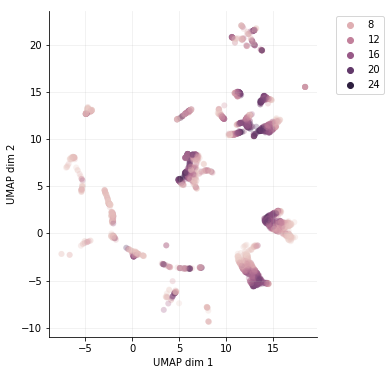

In [37]:
fig, ax = plt.subplots(figsize = (8, 6))
fig.patch.set_facecolor('white')
#

sns.scatterplot(
    x = 'UMAP dim 1',
    y = 'UMAP dim 2',
    hue = 'Level',
#     hue = 'Irregular rhythm - frequency',
#     hue = 'Stepchart - fullsong',
    linewidth = 0,
    alpha = 0.3,
    data = df[df['Level'] >= 5],
    ax = ax,
)
sns.despine()
plt.grid(alpha=0.2)
plt.gca().set_aspect('equal')
plt.legend(bbox_to_anchor=(1.05,1), loc = 'upper left')

### charts similar to, based on embedding

In [53]:
query_chart = 'Imagination - SHK S17 arcade'

e = np.array(df[df['Name (unique)'] == query_chart][['UMAP dim 1', 'UMAP dim 2']])

def dist(row):
    pt = np.array([row['UMAP dim 1'], row['UMAP dim 2']])
    return np.linalg.norm(pt - e)

dcol = f'Distance to {query_chart}'
df[dcol] = df.apply(dist, axis='columns')

In [54]:
row = df.iloc[0]
pt = np.array([row['UMAP dim 1'], row['UMAP dim 2']])
print(pt)

[ 4.7559257 12.091371 ]


In [57]:
df.sort_values(by = dcol, ascending = True)[['Name (unique)', 'UMAP dim 1', 'UMAP dim 2', dcol]].iloc[:15]

,Name (unique),UMAP dim 1,UMAP dim 2,Distance to Imagination - SHK S17 arcade
3435,Imagination - SHK S17 arcade,13.753675,19.440609,0.000000
3379,Hyperion - M2U S20 shortcut,13.763799,19.431849,0.013388
912,Poseidon - SHORT CUT - - Quree S21 shortcut,13.766505,19.429853,0.016742
3384,Poseidon - SHORT CUT - - Quree S14 shortcut,13.767213,19.429848,0.017294
3373,Forward - DJ Missill S2 arcade,13.768743,19.429319,0.018828
4136,Mr. Larpus - BanYa S22 arcade,13.768306,19.428028,0.019296
3809,XTREE - YAHPP SP2 arcade,13.741259,19.455523,0.019405
3340,Rainspark - Sanxion7 S9 arcade,13.769279,19.428808,0.019564
162,Let's Get the Party Started - Pink S10 arcade,13.772403,19.427668,0.022765
2449,Pray - Som2 S2 arcade,13.773519,19.426714,0.024225


Results don't seem to make sense.